## CIA_Data_science_for_Marketing_1

# 7 “,

In [308]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from lets_plot import *
LetsPlot.setup_html()   
from statsmodels import api as sm 

In [309]:
df = pd.read_csv("D:/Data Science for Marketing-I/data/bank-full.csv")

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# one-hot encoding on the categorical variables "job"

In [311]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [312]:
df['job'].unique()


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [313]:
job_encoded_df = pd.get_dummies(df['job'],dtype=int)
job_encoded_df
job_encoded_df.columns =['job_%s'% x for x in job_encoded_df.columns]

In [314]:
job_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


# one-hot encoding on the categorical variables "marital status".

In [315]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [316]:
marital_encoded_df = pd.get_dummies(df['marital'],dtype=int)
marital_encoded_df
marital_encoded_df.columns =['marital_%s'% x for x in marital_encoded_df.columns]

In [317]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [318]:
pd.get_dummies(df,columns=['job','marital'],dtype=int)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,...,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,may,151,...,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,may,76,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,may,92,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,may,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,cellular,17,nov,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,primary,no,1729,no,no,cellular,17,nov,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,secondary,no,5715,no,no,cellular,17,nov,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,secondary,no,668,no,no,telephone,17,nov,508,...,0,0,0,0,0,0,0,0,1,0


In [319]:
from sklearn import tree

In [320]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)
dt_model

DecisionTreeClassifier(max_depth=4)

In [321]:
encoded_df = pd.get_dummies(df,columns=['job','marital'],dtype=int)
full_df =  pd.concat([df,encoded_df],axis=1)
df=full_df.loc[:,~full_df.columns.duplicated()]
df['housing'] = df['housing'].apply(lambda x:0 if x == 'no'
                                 else 1)

df['loan'] = df['loan'].apply(lambda x:0 if x == 'no'
                                 else 1)




C:\Users\Mr. Royal\AppData\Local\Temp\ipykernel_10224\2623322956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing'] = df['housing'].apply(lambda x:0 if x == 'no'
C:\Users\Mr. Royal\AppData\Local\Temp\ipykernel_10224\2623322956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan'] = df['loan'].apply(lambda x:0 if x == 'no'


In [322]:
df['conversion']= df['Target'].apply (lambda x:0 if x == 'no' else 1)

C:\Users\Mr. Royal\AppData\Local\Temp\ipykernel_10224\2434822586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['conversion']= df['Target'].apply (lambda x:0 if x == 'no' else 1)


In [323]:
response_var = 'conversion'
features = ['age',  'balance', 'housing', 'campaign', 
       'previous','loan']

In [324]:

dt_model.fit(df[features],df[response_var])

DecisionTreeClassifier(max_depth=4)

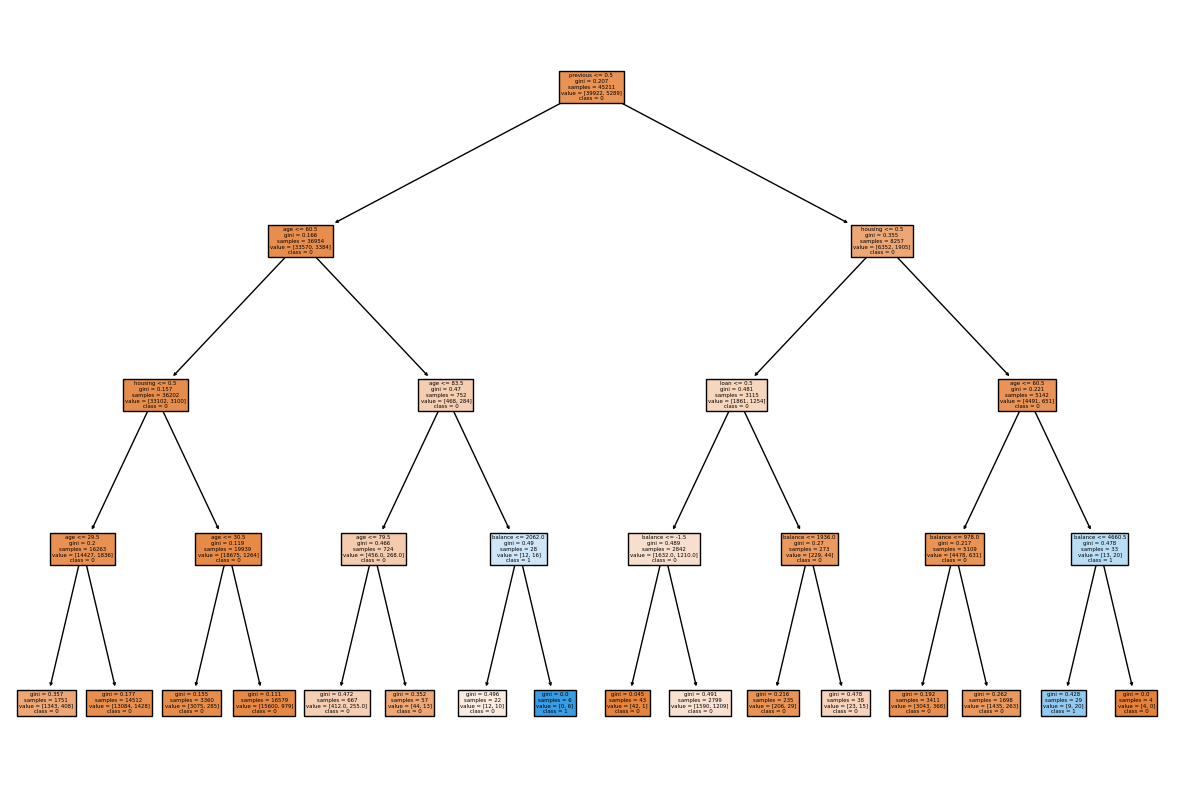

In [325]:
import matplotlib.pyplot as plt
class_names = [str(label) for label in dt_model.classes_]
plt.figure(figsize=(15,10))#
tree.plot_tree(dt_model,
               feature_names=features,
               class_names=class_names,
               filled=True)
plt.show()

In [326]:
df1 = pd.read_csv("D:/Data Science for Marketing-I/data/bank-additional-full.csv",sep = ';')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [327]:
df1['conversion']=df1['y'].apply(lambda x:1 if x=='yes' else 0)
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [328]:
df1['conversion'].value_counts()

conversion
0    36548
1     4640
Name: count, dtype: int64

In [329]:
pd.DataFrame(df1.groupby(by='marital')['conversion'].count())

,conversion
marital,
divorced,4612
married,24928
single,11568
unknown,80


In [330]:
conversions=pd.pivot_table(df1,index='marital',values='y',columns='conversion',aggfunc='count')
conversions

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


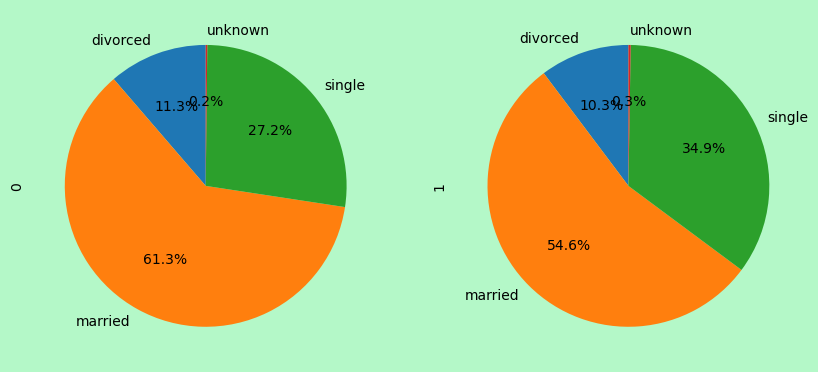

In [331]:
import matplotlib.pyplot as plt
conversions.plot(
    kind='pie',
    figsize=(10, 7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%',
    legend=None
)

plt.gca().set_facecolor("lightcyan")
plt.gcf().set_facecolor("#b4f8c8")  
plt.show()

In [332]:
Marital_conversion=(df1.groupby('marital')['conversion'].sum()/df.groupby('marital')['conversion'].count()*100)
Marital_conversion

marital
divorced     9.141540
married      9.304035
single      12.666145
unknown           NaN
Name: conversion, dtype: float64

<Axes: xlabel='marital'>

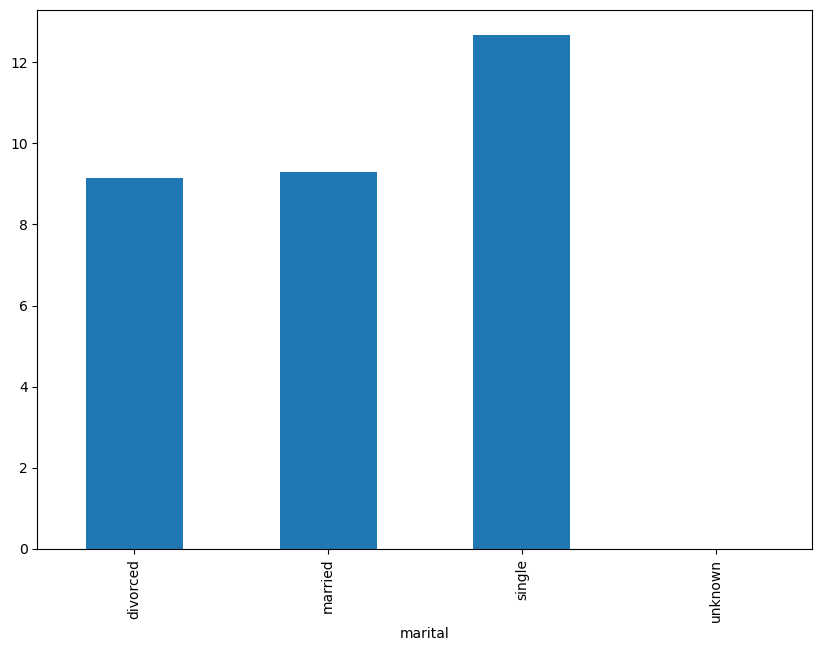

In [333]:
Marital_conversion.plot(kind='bar',figsize=(10,7))

In [334]:
df2 = pd.read_csv('D:/Data Science for Marketing-I/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')



In [335]:
df2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [336]:
df2['engaged'] = df2['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
df2


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0


In [337]:
gender_label,levels=df2["Gender"].factorize()

In [338]:
sales_label,levels=df2["Sales Channel"].factorize()

In [339]:
df2["Gender_Fact"]=gender_label
df2["Sales_Fact"]=sales_label

In [340]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [341]:
var=df2[['Gender_Fact','Sales_Fact']]
logit_fit=sm.Logit(df2["engaged"],var).fit()

Optimization terminated successfully.
         Current function value: 0.470083
         Iterations 6


In [342]:
print(logit_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                 -0.1445
Time:                        10:36:49   Log-Likelihood:                -4293.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender_Fact    -1.1087      0.046    -24.134      0.000      -1.199      -1.019
Sales_Fact     -0.6923      0.021    -33.232      0.000      -0.733      -0.651
